<a href="https://colab.research.google.com/github/Vyoma-garg/Natural-Language-Processing/blob/main/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting dataset**

In [ ]:
import pandas as pd
import gzip
false=False
true=True

def parse(path):
  g = gzip.open('/content/Magazine_Subscriptions.json.gz', 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Magazine_Subscriptions.json.gz')

Total Number of Magazine Subscriptions reviews 

In [ ]:
len(df)

89689

Total Number of reviews taken in consideration 

In [ ]:
df=df[:25000]
len(df)

25000

In [ ]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,Sentiment,Binary_Sentiment
0,5.0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN,Positive,1.0
1,5.0,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN,Positive,1.0
2,3.0,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN,Negative,0.0
3,5.0,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN,Positive,1.0
4,5.0,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN,Positive,1.0


Adding a column for Positive and Negative Sentiment

In [ ]:
df.loc[df['overall']<=3, 'Sentiment']='Negative'
df.loc[df['overall']>3, 'Sentiment']='Positive'
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,Sentiment
0,5.0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN,Positive
1,5.0,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN,Positive
2,3.0,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN,Negative
3,5.0,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN,Positive
4,5.0,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN,Positive


Adding a column for Sentiments in binary form

In [ ]:
df.loc[df['Sentiment']=='Negative', 'Binary_Sentiment']=0
df.loc[df['Sentiment']=='Positive', 'Binary_Sentiment']=1
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,Sentiment,Binary_Sentiment
0,5.0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN,Positive,1.0
1,5.0,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN,Positive,1.0
2,3.0,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN,Negative,0.0
3,5.0,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN,Positive,1.0
4,5.0,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN,Positive,1.0


In [ ]:
df.tail()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image,Sentiment,Binary_Sentiment
24995,5.0,NaN,True,"03 24, 2015",A1AG7VJ1T35X77,B00005QJE0,Darrin R. West,Gorgeous large format magazine. Very inspiring...,Gorgeous and Inspiring.,1427155200,{'Format:': ' Print Magazine'},NaN,Positive,1.0
24996,4.0,NaN,True,"07 30, 2014",A365DG6L5EUQQB,B00005QJE0,Charles Belew,Very happy with our subscribtions!,Four Stars,1406678400,{'Format:': ' Print Magazine'},NaN,Positive,1.0
24997,5.0,NaN,True,"02 26, 2014",A312FAW297PIOZ,B00005QJE0,kwilson,Love advice on gardening and the different gar...,Would. recommend this magazine to everyone .,1393372800,{'Format:': ' Print Magazine'},NaN,Positive,1.0
24998,5.0,NaN,True,"04 4, 2013",AUHOX5LLRIF11,B00005QJE0,Amazon Customer,photos are so good I look at these mags over a...,best gardening magazine,1365033600,{'Format:': ' Print Magazine'},NaN,Positive,1.0
24999,5.0,4,True,"02 6, 2013",A2P4CPM9S3QBDU,B00005QJE0,Linda W Owen,The English Garden is a wonderful gardening ma...,"The English Garden, good magizine for Americans",1360108800,{'Format:': ' Print Magazine'},NaN,Positive,1.0


# **MODULE-1(STATISTICS)--------------------------------------**

In [ ]:
from collections import Counter
all_data=["".join(str(x).replace("'","")) for x in df['reviewText']]
collect_data=""
for i in all_data:
  collect_data=collect_data+" "+i
collect_data

**1. Text Pre-processing methods:**

(i) Removing the punctuations

In [ ]:
import re
s=str(collect_data)
# Remove all non-word characters (everything except numbers and letters)
s = re.sub(r"[^\w\s]", '', s)
# replace digits with no space
s = re.sub(r"\d", '', s)
s=s.replace("\n", "")
s

(ii)Lowercasing all the words

In [ ]:
s=s.lower()
s

(iii)Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import punkt
nltk.download('punkt')
word_tokens = word_tokenize(s)
word_tokens

(iv)Removing stop words


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

In [ ]:
stop_words = set(stopwords.words('english'))   
 
filtered_words = []  
  
for w in word_tokens:  
    if w not in stop_words:  
        filtered_words.append(w)  
  
fs = pd.DataFrame(filtered_words)
fs
filtered_words

(v)Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import wordnet 
from nltk.stem import WordNetLemmatizer
word_lemma=WordNetLemmatizer()
count=0
for words in filtered_words:
  lemm_words=word_lemma.lemmatize(words)
  print(lemm_words)
  count+=1

In [ ]:
len(filtered_words)

590118

In [ ]:
filtered_sentence_string = (filtered_words)

In [ ]:
filtered_sentence_string = str(filtered_sentence_string)
type(filtered_sentence_string)
filtered_sentence_string = re.sub(r"[^\w\s]", '', filtered_sentence_string)
filtered_sentence_string

**2(a)Vocabulary size with word frequencies**

In [ ]:
#Getting the word frequencies
over_all=Counter(filtered_sentence_string.split())
total_words=len(filtered_sentence_string.split())
sorted_words=over_all.most_common(total_words)  #most frequently used words
sorted_words

VOCAB SIZE


In [ ]:
len(sorted_words)

36355

In [ ]:
#getting the word frequencies sorted by their RANK
convert_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
convert_vocab_to_int

**2(b)NGrams Generator Function**

In [ ]:
from nltk.util import ngrams

# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]


UniGrams


In [ ]:
one_gram1 = extract_ngrams(filtered_sentence_string, 1)
one_gram1[:20]

['computer',
 'enthusiast',
 'maxpc',
 'welcome',
 'sight',
 'mailbox',
 'remember',
 'years',
 'savorying',
 'every',
 'page',
 'boot',
 'called',
 'beginning',
 'still',
 'obcessed',
 'pcs',
 'anyone',
 'advanced',
 'users']

Bigrams


In [ ]:
one_gram2 = extract_ngrams(filtered_sentence_string, 2)
one_gram2[:20]

['computer enthusiast',
 'enthusiast maxpc',
 'maxpc welcome',
 'welcome sight',
 'sight mailbox',
 'mailbox remember',
 'remember years',
 'years savorying',
 'savorying every',
 'every page',
 'page boot',
 'boot called',
 'called beginning',
 'beginning still',
 'still obcessed',
 'obcessed pcs',
 'pcs anyone',
 'anyone advanced',
 'advanced users',
 'users beginners']

Trigrams


In [ ]:
one_gram3 = extract_ngrams(filtered_sentence_string, 3)
one_gram3[:20]

['computer enthusiast maxpc',
 'enthusiast maxpc welcome',
 'maxpc welcome sight',
 'welcome sight mailbox',
 'sight mailbox remember',
 'mailbox remember years',
 'remember years savorying',
 'years savorying every',
 'savorying every page',
 'every page boot',
 'page boot called',
 'boot called beginning',
 'called beginning still',
 'beginning still obcessed',
 'still obcessed pcs',
 'obcessed pcs anyone',
 'pcs anyone advanced',
 'anyone advanced users',
 'advanced users beginners',
 'users beginners looking']

Ngrams ( N = 4 )

In [ ]:
one_gram4 = extract_ngrams(filtered_sentence_string, 4)
one_gram4[:20]

['computer enthusiast maxpc welcome',
 'enthusiast maxpc welcome sight',
 'maxpc welcome sight mailbox',
 'welcome sight mailbox remember',
 'sight mailbox remember years',
 'mailbox remember years savorying',
 'remember years savorying every',
 'years savorying every page',
 'savorying every page boot',
 'every page boot called',
 'page boot called beginning',
 'boot called beginning still',
 'called beginning still obcessed',
 'beginning still obcessed pcs',
 'still obcessed pcs anyone',
 'obcessed pcs anyone advanced',
 'pcs anyone advanced users',
 'anyone advanced users beginners',
 'advanced users beginners looking',
 'users beginners looking knowledge']

**2(c)POS collections**

In [ ]:
#POS tags
nltk.download('averaged_perceptron_tagger')
for tokens in filtered_words:
  tags=nltk.pos_tag([tokens])
  print(tags)

In [ ]:
#NER chunks
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')

for tokens in filtered_words:
  tags=nltk.pos_tag([tokens])
  print(ne_chunk(tags))


**3. ZIPF'S LAW**

In [ ]:
freq_list = []
rank_list = []
for x in range(len(sorted_words)):
    freq_list.append(sorted_words[x][1])
    rank_list.append(x+1)

In [ ]:
import numpy as np

x = (rank_list) #1,2,
y = np.log2(freq_list)
xmean = np.mean(x)
ymean = np.mean(y)
x_xmean = x - xmean
y_ymean = y - ymean
covariance = sum(x_xmean * y_ymean)
variance = sum(x_xmean * x_xmean)

def getYhat(input_x):
        input_x = np.array(input_x)
        return intercept + slope * input_x    

def getCoefficients():
        slope = covariance/variance
        intercept = ymean - (xmean * slope)
        return intercept, slope

In [ ]:
print(freq_list[0],y[0],x[1])

44998 15.45757325978724 2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(np.reshape(X_train,(-1,1)), np.reshape(y_train,(-1,1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.intercept_)

[3.71316796]


In [ ]:
print(regressor.coef_)

[[-0.00011966]]


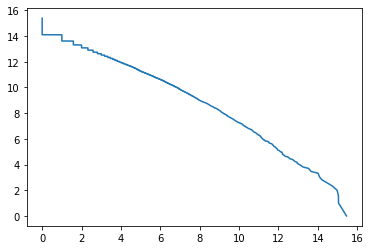

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y,np.log2(x))

In [ ]:
#Calculate the frequency of the words inside
from operator import itemgetter
frequency = {}
for word in one_gram1 :
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df2 = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

In [ ]:
for word , freq in collection:
    df2.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1
print ([df2])

[               Rank Frequency Frequency * Rank
magazine          1     19924            19924
great             2      6696            13392
articles          3      5891            17673
like              4      5094            20376
good              5      4953            24765
...             ...       ...              ...
resurrection  36351         1            36351
britaini      36352         1            36352
cultivation   36353         1            36353
analyzes      36354         1            36354
booksthe      36355         1            36355

[36355 rows x 3 columns]]


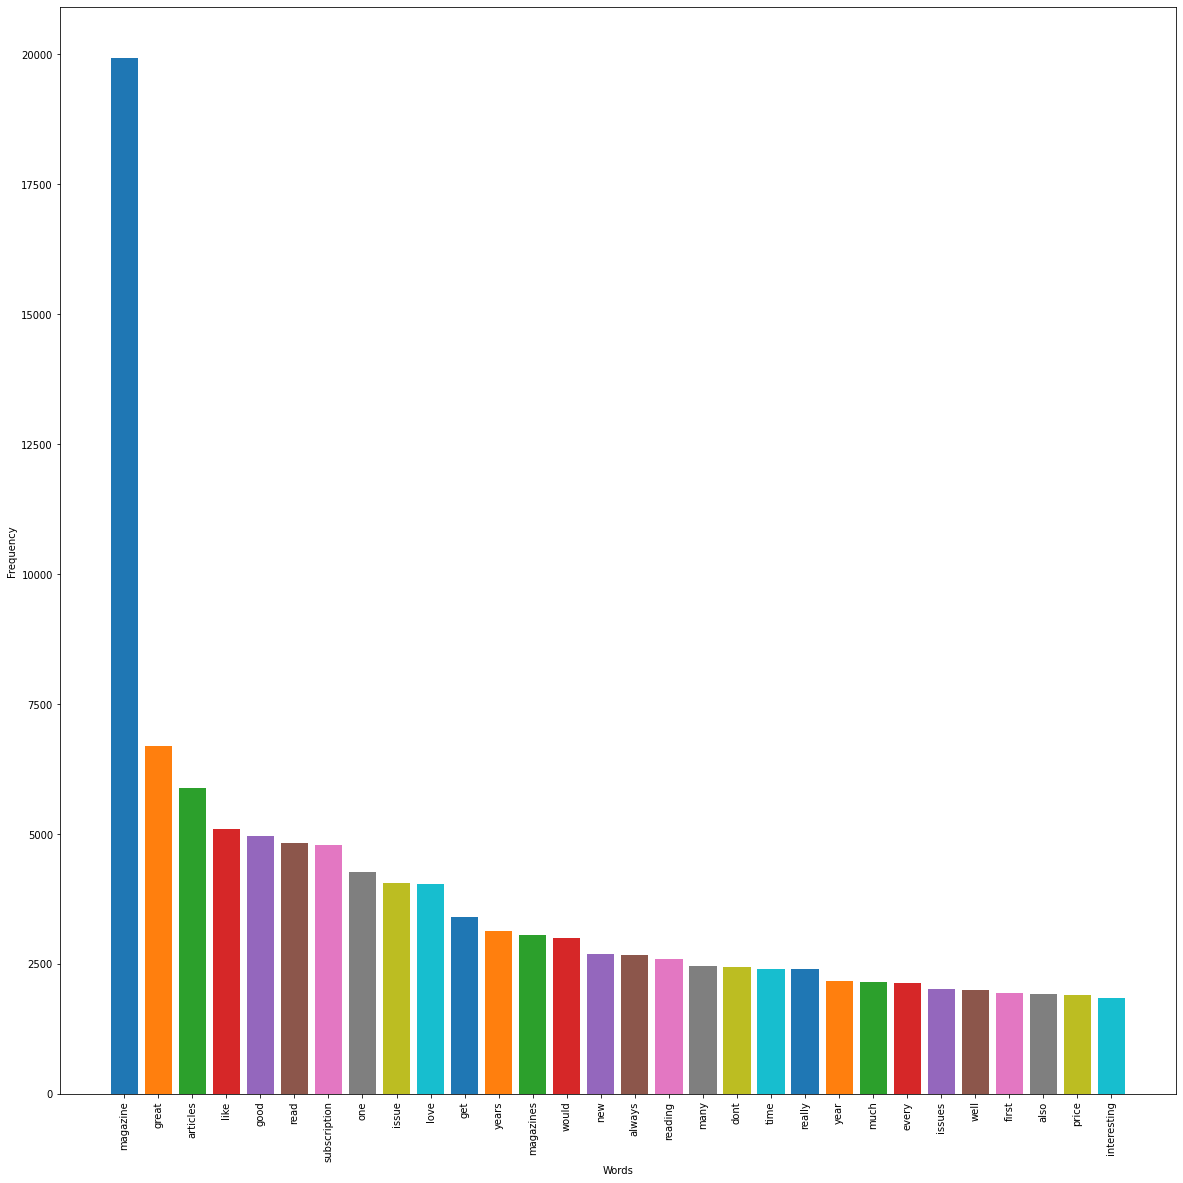

In [ ]:
#visualization with pyplot
plt.figure(figsize=(20,20))  #to increase the plot resolution
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)    #to rotate x-axis values

for word , freq in collection[:30]:
    plt.bar(word, freq)    
plt.show()

In [ ]:
df2.tail()

,Rank,Frequency,Frequency * Rank
resurrection,36351,1,36351
britaini,36352,1,36352
cultivation,36353,1,36353
analyzes,36354,1,36354
booksthe,36355,1,36355


**4. Set of terms describing the corpus best**

In [ ]:
counts = [(w, one_gram1.count(w)) for w in one_gram1[:10000] ]
counts

In [ ]:
[(w, c) for (w, c) in counts if c > 3000]